# 📐 Développement et Tests - Modèle de Markowitz

Ce notebook développe et teste les méthodes d'optimisation classiques de Markowitz.

**Objectifs:**
- Implémenter et tester les méthodes de scalarisation
- Implémenter et tester la méthode epsilon-contrainte
- Générer et visualiser la frontière efficace
- Identifier le portefeuille tangent (Sharpe maximum)
- Comparer les différentes approches

In [1]:
# Imports
import sys
sys.path.insert(0, '../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time

from data_loader import prepare_data
from financial_metrics import (
    portfolio_return, portfolio_risk, portfolio_volatility,
    sharpe_ratio, portfolio_cardinality
)
from optimizers.classic import (
    scalarization_weighted_sum,
    epsilon_constraint,
    generate_efficient_frontier_scalarization,
    generate_efficient_frontier_epsilon,
    find_tangency_portfolio,
    find_minimum_variance_portfolio
)

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✅ Imports réussis")

✅ Imports réussis


## 1. Chargement des Données

In [2]:
# Charge les données
prices, returns, mu, Sigma, ticker_sectors = prepare_data(
    start_date="2020-01-01",
    end_date="2024-12-31",
    data_dir="../data/raw"
)

tickers = list(prices.columns)
n_assets = len(tickers)
rf = 0.02  # Taux sans risque 2%

print(f"📊 Nombre d'actifs: {n_assets}")
print(f"💰 Taux sans risque: {rf*100}%")
print(f"\n📈 Rendement moyen du marché: {mu.mean()*100:.2f}%")
print(f"📊 Volatilité moyenne du marché: {np.sqrt(np.diag(Sigma)).mean()*100:.2f}%")

📊 Nombre d'actifs: 196
💰 Taux sans risque: 2.0%

📈 Rendement moyen du marché: 10.42%
📊 Volatilité moyenne du marché: 35.38%


c:\Users\redlam\Downloads\PROJET_PORTFOLIO_OPTIMIZATION\notebooks\../src\data_loader.py:88: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = data_clean.fillna(method='ffill').fillna(method='bfill')


## 2. Portefeuilles de Référence

In [3]:
# Portefeuille équipondéré
w_equal = np.ones(n_assets) / n_assets
ret_equal = portfolio_return(w_equal, mu)
vol_equal = portfolio_volatility(w_equal, Sigma)
sharpe_equal = sharpe_ratio(w_equal, mu, Sigma, rf)

print("📊 Portefeuille Équipondéré (1/N):")
print(f"  Rendement: {ret_equal*100:.2f}%")
print(f"  Volatilité: {vol_equal*100:.2f}%")
print(f"  Sharpe: {sharpe_equal:.3f}")

📊 Portefeuille Équipondéré (1/N):
  Rendement: 10.42%
  Volatilité: 22.14%
  Sharpe: 0.380


In [4]:
# Portefeuille de variance minimale
print("\n🔍 Calcul du portefeuille de variance minimale...")
w_minvar = find_minimum_variance_portfolio(Sigma)
ret_minvar = portfolio_return(w_minvar, mu)
vol_minvar = portfolio_volatility(w_minvar, Sigma)
sharpe_minvar = sharpe_ratio(w_minvar, mu, Sigma, rf)
card_minvar = portfolio_cardinality(w_minvar)

print("\n📊 Portefeuille de Variance Minimale:")
print(f"  Rendement: {ret_minvar*100:.2f}%")
print(f"  Volatilité: {vol_minvar*100:.2f}%")
print(f"  Sharpe: {sharpe_minvar:.3f}")
print(f"  Cardinalité: {card_minvar}")


🔍 Calcul du portefeuille de variance minimale...

📊 Portefeuille de Variance Minimale:
  Rendement: 8.66%
  Volatilité: 13.53%
  Sharpe: 0.492
  Cardinalité: 19


In [5]:
# Portefeuille tangent (Sharpe maximum)
print("\n🔍 Calcul du portefeuille tangent...")
w_tangent = find_tangency_portfolio(mu, Sigma, rf)
ret_tangent = portfolio_return(w_tangent, mu)
vol_tangent = portfolio_volatility(w_tangent, Sigma)
sharpe_tangent = sharpe_ratio(w_tangent, mu, Sigma, rf)
card_tangent = portfolio_cardinality(w_tangent)

print("\n📊 Portefeuille Tangent (Sharpe Max):")
print(f"  Rendement: {ret_tangent*100:.2f}%")
print(f"  Volatilité: {vol_tangent*100:.2f}%")
print(f"  Sharpe: {sharpe_tangent:.3f}")
print(f"  Cardinalité: {card_tangent}")


🔍 Calcul du portefeuille tangent...

📊 Portefeuille Tangent (Sharpe Max):
  Rendement: 16.11%
  Volatilité: 20.65%
  Sharpe: 0.683
  Cardinalité: 95


## 3. Méthode de Scalarisation

In [6]:
# Test sur quelques valeurs d'alpha
alphas_test = [0.0, 0.25, 0.5, 0.75, 1.0]
results_scalar = []

for alpha in alphas_test:
    w = scalarization_weighted_sum(mu, Sigma, alpha)
    ret = portfolio_return(w, mu)
    vol = portfolio_volatility(w, Sigma)
    sh = sharpe_ratio(w, mu, Sigma, rf)
    card = portfolio_cardinality(w)
    
    results_scalar.append({
        'Alpha': alpha,
        'Rendement (%)': ret * 100,
        'Volatilité (%)': vol * 100,
        'Sharpe': sh,
        'Cardinalité': card
    })

df_scalar = pd.DataFrame(results_scalar)
print("📊 Résultats de la scalarisation pour différentes valeurs d'α:")
print("\nα = 0 → Maximise le rendement")
print("α = 1 → Minimise le risque\n")
df_scalar

c:\Users\redlam\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


📊 Résultats de la scalarisation pour différentes valeurs d'α:

α = 0 → Maximise le rendement
α = 1 → Minimise le risque



,Alpha,Rendement (%),Volatilité (%),Sharpe,Cardinalité
0,0.00,64.007102,55.623333,1.114768,1
1,0.25,60.155351,52.547868,1.106712,1
2,0.50,50.684945,37.149665,1.310508,3
3,0.75,36.398006,23.505266,1.463417,10
4,1.00,8.662602,13.528356,0.492492,19


In [7]:
# Génération de la frontière efficace complète
print("🔍 Génération de la frontière efficace par scalarisation...")
start_time = time.time()

portfolios_scalar, rets_scalar, risks_scalar = generate_efficient_frontier_scalarization(
    mu, Sigma, n_points=100
)

elapsed = time.time() - start_time
vols_scalar = np.sqrt(risks_scalar)

print(f"✅ Frontière générée en {elapsed:.2f}s")
print(f"📊 Nombre de portefeuilles: {len(rets_scalar)}")
print(f"📈 Rendement: [{rets_scalar.min()*100:.2f}%, {rets_scalar.max()*100:.2f}%]")
print(f"📊 Volatilité: [{vols_scalar.min()*100:.2f}%, {vols_scalar.max()*100:.2f}%]")

🔍 Génération de la frontière efficace par scalarisation...


c:\Users\redlam\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


✅ Frontière générée en 6.65s
📊 Nombre de portefeuilles: 100
📈 Rendement: [8.66%, 64.01%]
📊 Volatilité: [13.53%, 55.62%]


## 4. Méthode Epsilon-Contrainte

In [8]:
# Génération de la frontière efficace par epsilon-contrainte
print("🔍 Génération de la frontière efficace par epsilon-contrainte...")
start_time = time.time()

portfolios_eps, rets_eps, risks_eps = generate_efficient_frontier_epsilon(
    mu, Sigma, n_points=100
)

elapsed = time.time() - start_time
vols_eps = np.sqrt(risks_eps)

print(f"✅ Frontière générée en {elapsed:.2f}s")
print(f"📊 Nombre de portefeuilles: {len(rets_eps)}")
print(f"📈 Rendement: [{rets_eps.min()*100:.2f}%, {rets_eps.max()*100:.2f}%]")
print(f"📊 Volatilité: [{vols_eps.min()*100:.2f}%, {vols_eps.max()*100:.2f}%]")

🔍 Génération de la frontière efficace par epsilon-contrainte...
✅ Frontière générée en 7.09s
📊 Nombre de portefeuilles: 100
📈 Rendement: [8.66%, 60.15%]
📊 Volatilité: [13.53%, 52.38%]


## 5. Visualisation et Comparaison

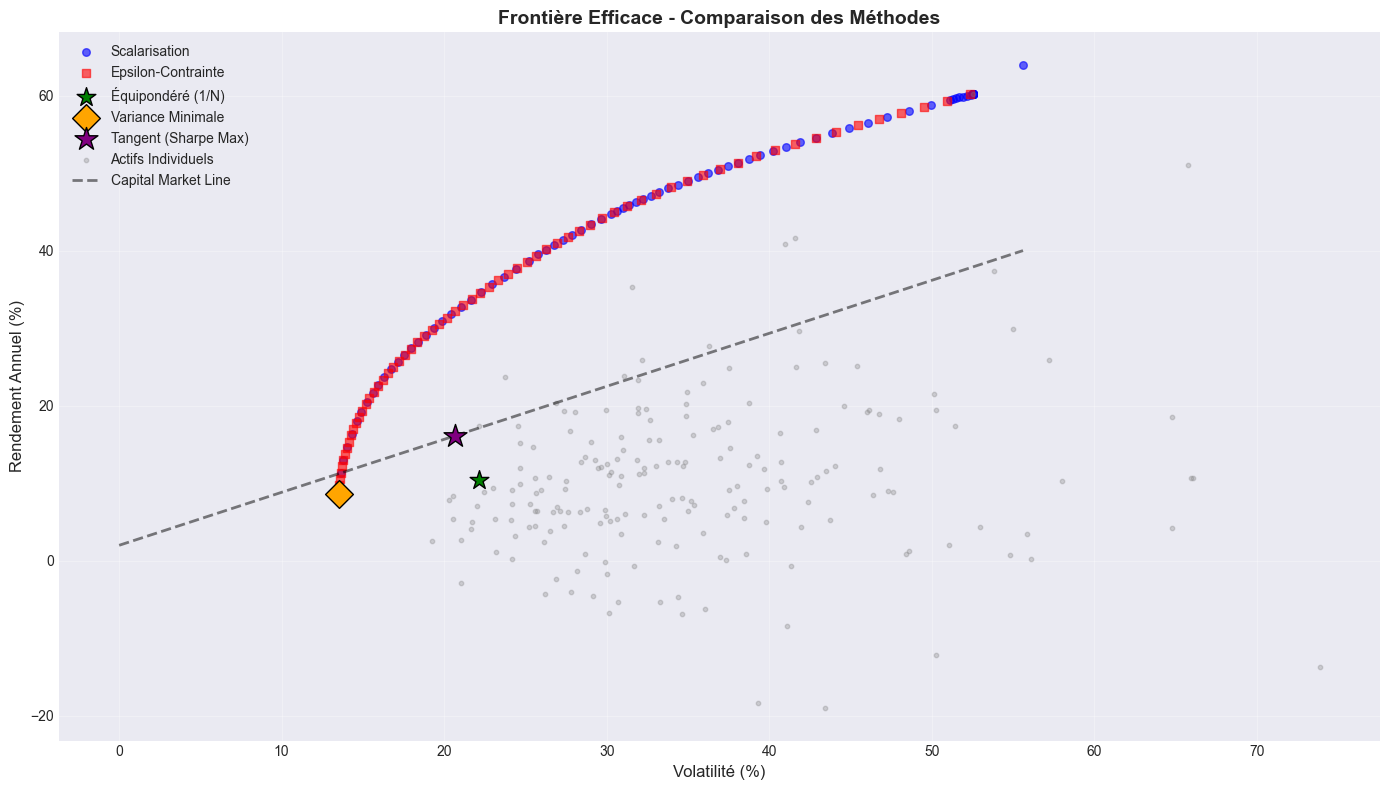

In [9]:
# Comparaison visuelle des deux méthodes
fig, ax = plt.subplots(figsize=(14, 8))

# Frontière scalarisation
ax.scatter(vols_scalar * 100, rets_scalar * 100, 
          c='blue', s=30, alpha=0.6, label='Scalarisation', marker='o')

# Frontière epsilon-contrainte
ax.scatter(vols_eps * 100, rets_eps * 100,
          c='red', s=30, alpha=0.6, label='Epsilon-Contrainte', marker='s')

# Portefeuilles de référence
ax.scatter(vol_equal * 100, ret_equal * 100,
          c='green', s=200, marker='*', edgecolors='black',
          label='Équipondéré (1/N)', zorder=5)

ax.scatter(vol_minvar * 100, ret_minvar * 100,
          c='orange', s=200, marker='D', edgecolors='black',
          label='Variance Minimale', zorder=5)

ax.scatter(vol_tangent * 100, ret_tangent * 100,
          c='purple', s=300, marker='*', edgecolors='black',
          label='Tangent (Sharpe Max)', zorder=5)

# Actifs individuels
asset_vols = np.sqrt(np.diag(Sigma))
ax.scatter(asset_vols * 100, mu * 100,
          c='gray', s=10, alpha=0.3, label='Actifs Individuels')

# Capital Market Line
x_cml = np.linspace(0, vols_scalar.max() * 100, 100)
y_cml = rf * 100 + sharpe_tangent * x_cml
ax.plot(x_cml, y_cml, 'k--', linewidth=2, label='Capital Market Line', alpha=0.5)

ax.set_xlabel('Volatilité (%)', fontsize=12)
ax.set_ylabel('Rendement Annuel (%)', fontsize=12)
ax.set_title('Frontière Efficace - Comparaison des Méthodes', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

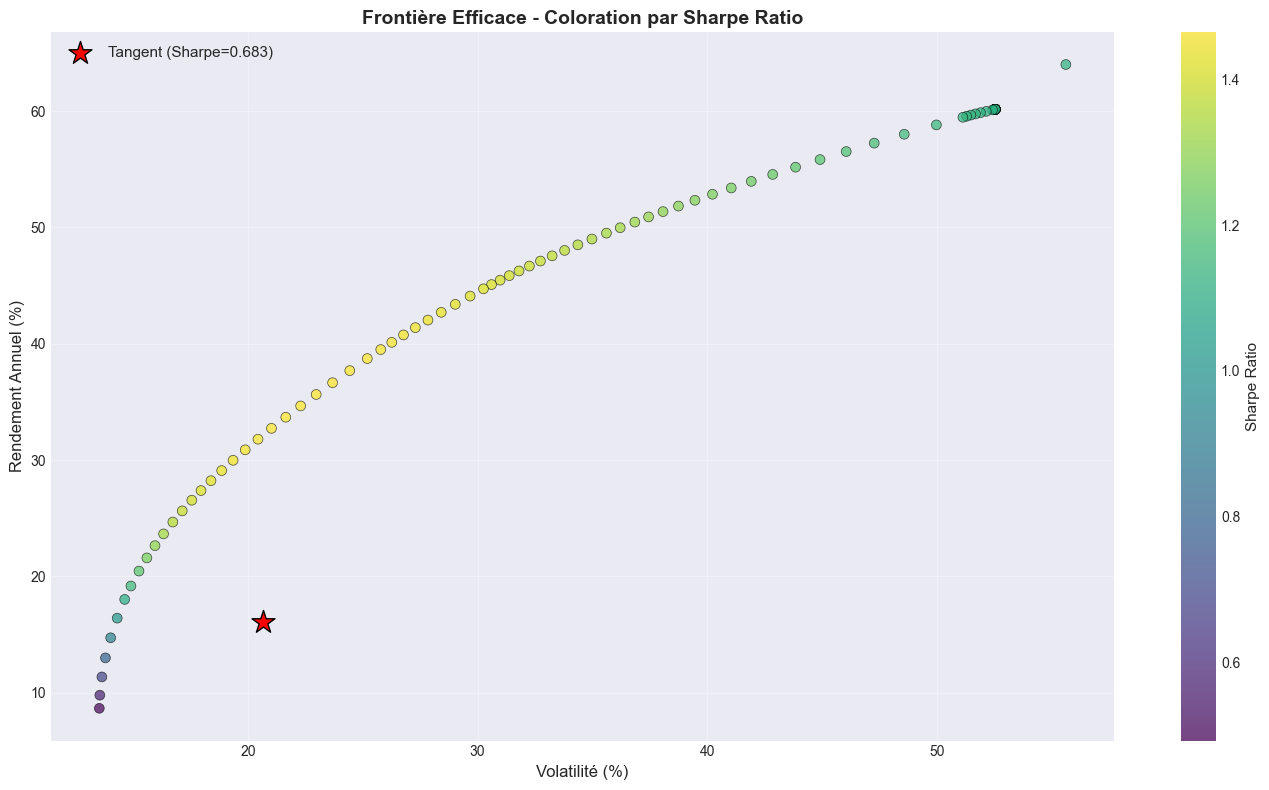

In [10]:
# Zoom sur la frontière efficace
fig, ax = plt.subplots(figsize=(14, 8))

# Coloration par Sharpe ratio
sharpe_scalar = (rets_scalar - rf) / vols_scalar
sharpe_eps = (rets_eps - rf) / vols_eps

scatter1 = ax.scatter(vols_scalar * 100, rets_scalar * 100,
                     c=sharpe_scalar, cmap='viridis', s=50, 
                     alpha=0.7, edgecolors='black', linewidth=0.5)

ax.scatter(vol_tangent * 100, ret_tangent * 100,
          c='red', s=300, marker='*', edgecolors='black',
          label=f'Tangent (Sharpe={sharpe_tangent:.3f})', zorder=5)

cbar = plt.colorbar(scatter1, ax=ax)
cbar.set_label('Sharpe Ratio', fontsize=11)

ax.set_xlabel('Volatilité (%)', fontsize=12)
ax.set_ylabel('Rendement Annuel (%)', fontsize=12)
ax.set_title('Frontière Efficace - Coloration par Sharpe Ratio', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Analyse de la Composition des Portefeuilles

In [11]:
# Analyse du portefeuille tangent
print("🔍 TOP 15 positions du portefeuille tangent:")
top_indices = np.argsort(w_tangent)[-15:][::-1]
df_tangent = pd.DataFrame({
    'Ticker': [tickers[i] for i in top_indices],
    'Poids (%)': [w_tangent[i] * 100 for i in top_indices],
    'Rendement (%)': [mu[i] * 100 for i in top_indices],
    'Volatilité (%)': [np.sqrt(Sigma[i, i]) * 100 for i in top_indices],
    'Secteur': [ticker_sectors.get(tickers[i], 'Unknown') for i in top_indices]
})
df_tangent

🔍 TOP 15 positions du portefeuille tangent:


,Ticker,Poids (%),Rendement (%),Volatilité (%),Secteur
0,SO,4.766098,9.127189,25.953080,Utilities
1,PM,3.446099,11.911358,24.696481,Consumer Staples
2,GIS,2.875003,7.029148,22.014134,Consumer Staples
3,OTIS,2.771650,15.143619,24.645194,Industrials
4,ABBV,2.569860,17.387967,24.522493,Health Care
5,KO,2.315181,5.394768,20.520700,Consumer Staples
6,WMB,2.258156,21.828063,34.922230,Energy
7,GS,2.220932,19.632704,32.449280,Financials
8,TMUS,2.204983,20.324193,26.873010,Communication Services
9,BLK,2.191257,15.944056,30.893045,Financials


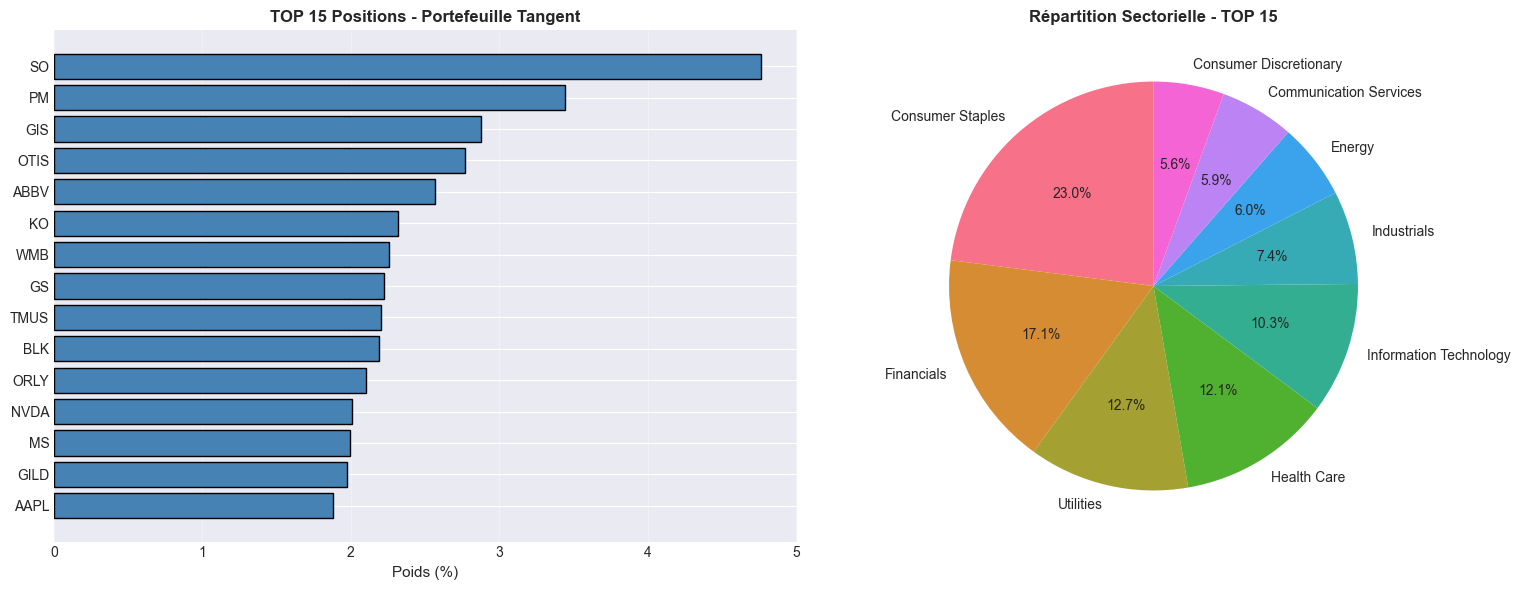

In [12]:
# Visualisation de la composition
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot des poids
axes[0].barh(df_tangent['Ticker'], df_tangent['Poids (%)'], color='steelblue', edgecolor='black')
axes[0].set_xlabel('Poids (%)', fontsize=11)
axes[0].set_title('TOP 15 Positions - Portefeuille Tangent', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Répartition sectorielle
sector_weights = df_tangent.groupby('Secteur')['Poids (%)'].sum().sort_values(ascending=False)
axes[1].pie(sector_weights, labels=sector_weights.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette('husl', len(sector_weights)))
axes[1].set_title('Répartition Sectorielle - TOP 15', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Évolution de la Cardinalité le Long de la Frontière

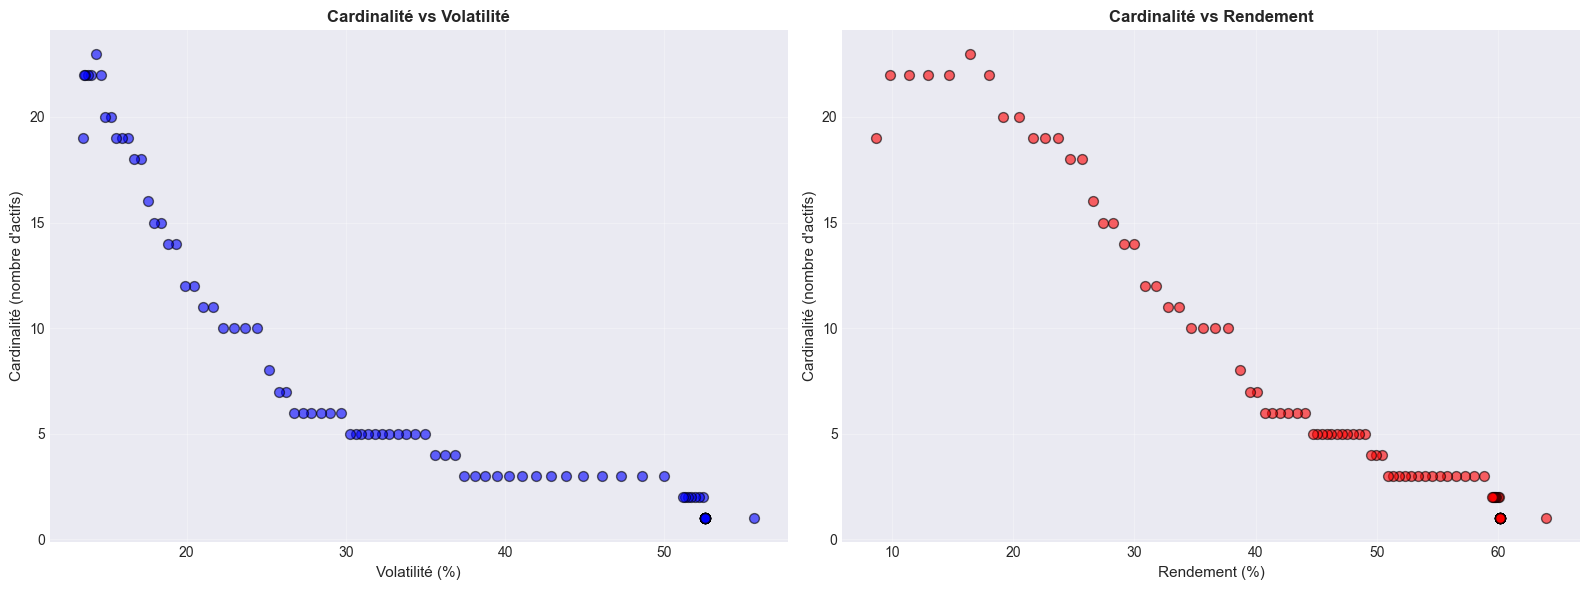

📊 Cardinalité moyenne: 6.5
📊 Cardinalité min: 1
📊 Cardinalité max: 23


In [13]:
# Calcul de la cardinalité pour chaque portefeuille
cards_scalar = [portfolio_cardinality(w) for w in portfolios_scalar]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cardinalité vs Volatilité
axes[0].scatter(vols_scalar * 100, cards_scalar, c='blue', s=50, alpha=0.6, edgecolors='black')
axes[0].set_xlabel('Volatilité (%)', fontsize=11)
axes[0].set_ylabel('Cardinalité (nombre d\'actifs)', fontsize=11)
axes[0].set_title('Cardinalité vs Volatilité', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cardinalité vs Rendement
axes[1].scatter(rets_scalar * 100, cards_scalar, c='red', s=50, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('Rendement (%)', fontsize=11)
axes[1].set_ylabel('Cardinalité (nombre d\'actifs)', fontsize=11)
axes[1].set_title('Cardinalité vs Rendement', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Cardinalité moyenne: {np.mean(cards_scalar):.1f}")
print(f"📊 Cardinalité min: {np.min(cards_scalar)}")
print(f"📊 Cardinalité max: {np.max(cards_scalar)}")

## 8. Analyse de Sensibilité

In [14]:
# Impact du taux sans risque sur le portefeuille tangent
rf_values = np.linspace(0.0, 0.05, 11)
results_rf = []

for rf_test in rf_values:
    w_tang_test = find_tangency_portfolio(mu, Sigma, rf_test)
    ret = portfolio_return(w_tang_test, mu)
    vol = portfolio_volatility(w_tang_test, Sigma)
    sharpe = (ret - rf_test) / vol
    card = portfolio_cardinality(w_tang_test)
    
    results_rf.append({
        'rf (%)': rf_test * 100,
        'Rendement (%)': ret * 100,
        'Volatilité (%)': vol * 100,
        'Sharpe': sharpe,
        'Cardinalité': card
    })

df_rf = pd.DataFrame(results_rf)

print("📊 Impact du taux sans risque sur le portefeuille tangent:")
df_rf

📊 Impact du taux sans risque sur le portefeuille tangent:


,rf (%),Rendement (%),Volatilité (%),Sharpe,Cardinalité
0,0.0,16.039187,20.554327,0.780331,95
1,0.5,16.060606,20.577449,0.756197,95
2,1.0,16.080308,20.603702,0.731922,95
3,1.5,16.095633,20.626829,0.707604,95
4,2.0,16.110935,20.650180,0.683332,95
5,2.5,16.126273,20.673715,0.659111,95
6,3.0,16.141694,20.697401,0.634944,95
7,3.5,16.157197,20.721240,0.610832,95
8,4.0,16.172784,20.745233,0.586775,95
9,4.5,16.188544,20.769375,0.562778,95


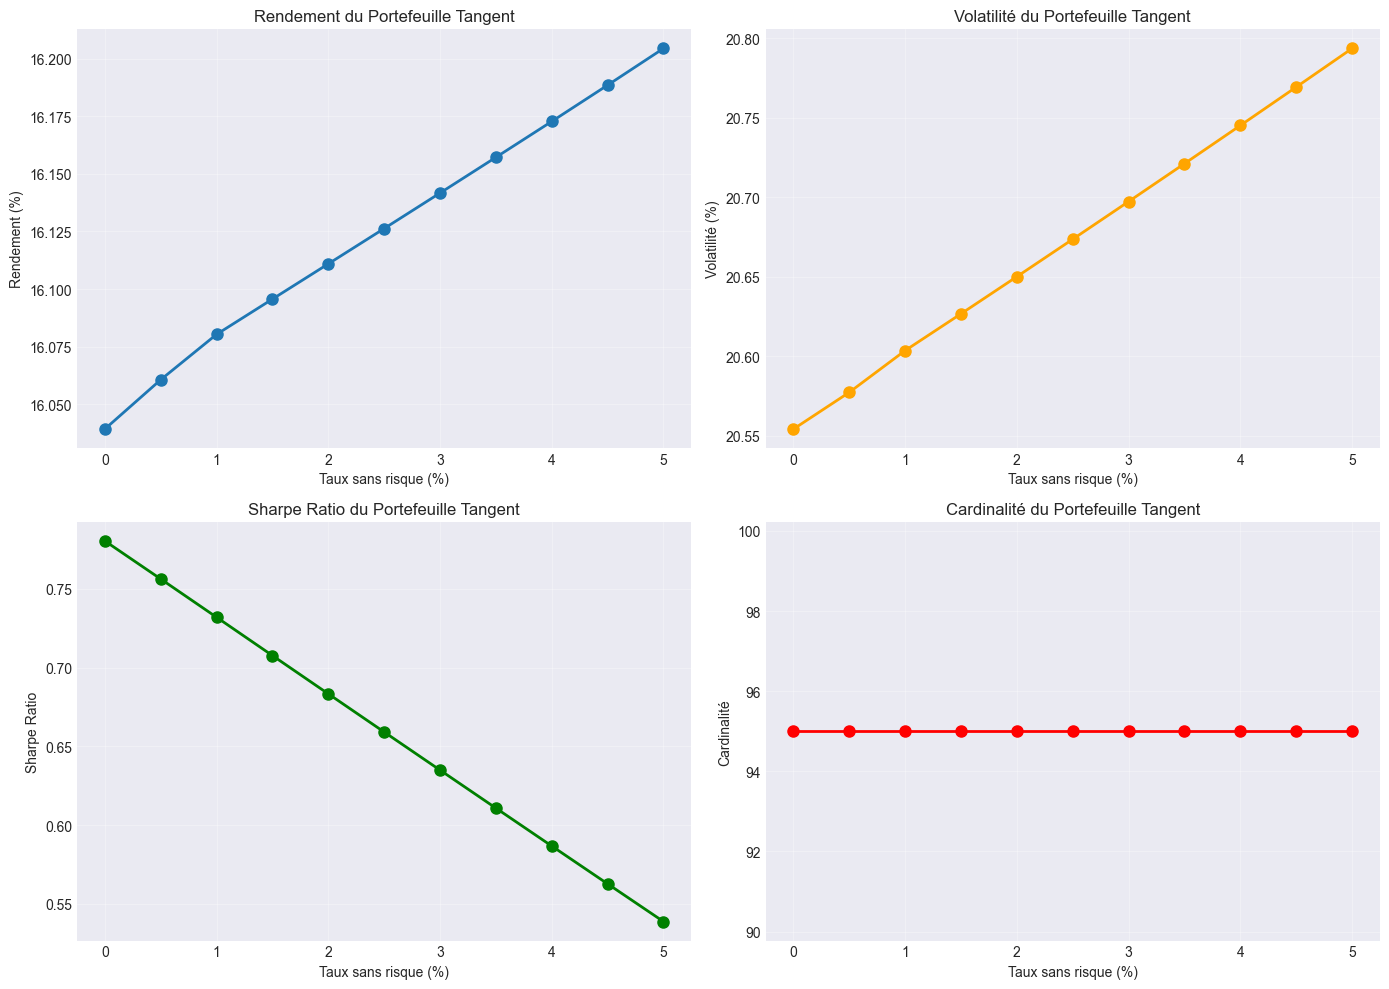

In [15]:
# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(df_rf['rf (%)'], df_rf['Rendement (%)'], 'o-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Taux sans risque (%)')
axes[0, 0].set_ylabel('Rendement (%)')
axes[0, 0].set_title('Rendement du Portefeuille Tangent')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df_rf['rf (%)'], df_rf['Volatilité (%)'], 'o-', color='orange', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Taux sans risque (%)')
axes[0, 1].set_ylabel('Volatilité (%)')
axes[0, 1].set_title('Volatilité du Portefeuille Tangent')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(df_rf['rf (%)'], df_rf['Sharpe'], 'o-', color='green', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Taux sans risque (%)')
axes[1, 0].set_ylabel('Sharpe Ratio')
axes[1, 0].set_title('Sharpe Ratio du Portefeuille Tangent')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(df_rf['rf (%)'], df_rf['Cardinalité'], 'o-', color='red', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Taux sans risque (%)')
axes[1, 1].set_ylabel('Cardinalité')
axes[1, 1].set_title('Cardinalité du Portefeuille Tangent')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Sauvegarde des Résultats

In [16]:
# Sauvegarde des portefeuilles optimaux
output_dir = Path('../data/processed')

# Portefeuille tangent
np.save(output_dir / 'portfolio_tangent.npy', w_tangent)

# Portefeuille min variance
np.save(output_dir / 'portfolio_minvar.npy', w_minvar)

# Frontière efficace
np.savez(output_dir / 'efficient_frontier_markowitz.npz',
         portfolios=portfolios_scalar,
         returns=rets_scalar,
         risks=risks_scalar,
         volatilities=vols_scalar)

# Métriques des portefeuilles de référence
ref_portfolios = pd.DataFrame({
    'Portfolio': ['Équipondéré', 'Min Variance', 'Tangent'],
    'Rendement (%)': [ret_equal*100, ret_minvar*100, ret_tangent*100],
    'Volatilité (%)': [vol_equal*100, vol_minvar*100, vol_tangent*100],
    'Sharpe': [sharpe_equal, sharpe_minvar, sharpe_tangent],
    'Cardinalité': [n_assets, card_minvar, card_tangent]
})
ref_portfolios.to_csv(output_dir / 'reference_portfolios.csv', index=False)

print("✅ Résultats Markowitz sauvegardés dans:", output_dir)
print("  - portfolio_tangent.npy")
print("  - portfolio_minvar.npy")
print("  - efficient_frontier_markowitz.npz")
print("  - reference_portfolios.csv")

✅ Résultats Markowitz sauvegardés dans: ..\data\processed
  - portfolio_tangent.npy
  - portfolio_minvar.npy
  - efficient_frontier_markowitz.npz
  - reference_portfolios.csv


## 🎯 Conclusions

**Observations principales:**

1. **Méthodes équivalentes:** Scalarisation et epsilon-contrainte produisent des frontières similaires
2. **Portefeuille tangent:** Maximise le Sharpe ratio, compromis optimal rendement/risque
3. **Cardinalité non contrôlée:** Les portefeuilles Markowitz classiques utilisent généralement beaucoup d'actifs
4. **Sensibilité au rf:** Le portefeuille tangent est sensible au taux sans risque
5. **Concentration:** Certains portefeuilles sont très concentrés (min variance)

**Limitations identifiées:**
- Pas de contrôle de la cardinalité
- Pas de prise en compte des coûts de transaction
- Solutions parfois peu réalistes (trop d'actifs ou trop concentrées)

**➡️ Prochaine étape:** NSGA-II avec contraintes opérationnelles